In [1]:
from google.colab import files
uploaded=files.upload()

Saving fcc-forum-pageviews.csv to fcc-forum-pageviews (3).csv


In [2]:
#Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io

df=pd.read_csv(io.BytesIO(uploaded['fcc-forum-pageviews.csv']),parse_dates=['date'],index_col='date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df=df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0, 0.5, 'Page Views')

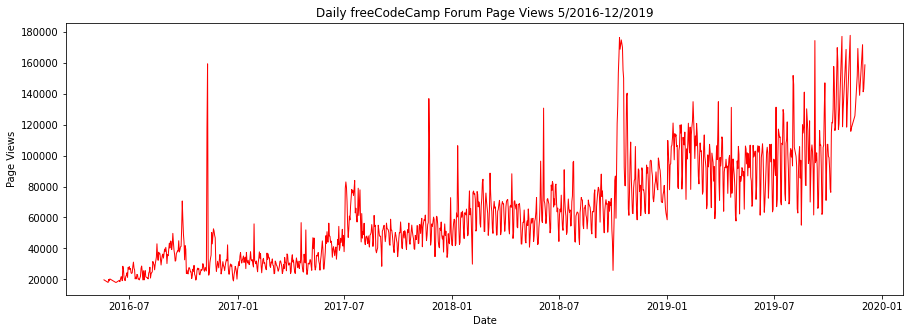

In [4]:
#Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
#The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". 
#The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

fig,ax =plt.subplots(figsize=(15,5))
ax.plot(df.index,df.value,'r',linewidth=1)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

In [5]:
#Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png".
#It should show average daily page views for each month grouped by year. 
#The legend should show month labels and have a title of "Months". 
#On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
df_bar=df.copy()
df_bar['year']=df.index.year
df_bar['month']=df.index.month

df_bar=df_bar.groupby(['year','month'])['value'].mean()
df_bar

year  month
2016  5         19432.400000
      6         21875.105263
      7         24109.678571
      8         31049.193548
      9         41476.866667
      10        27398.322581
      11        40448.633333
      12        27832.419355
2017  1         32785.161290
      2         31113.071429
      3         29369.096774
      4         30878.733333
      5         34244.290323
      6         43577.500000
      7         65806.838710
      8         47712.451613
      9         47376.800000
      10        47438.709677
      11        57701.566667
      12        48420.580645
2018  1         58580.096774
      2         65679.000000
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10       111378.142857
      11        78688.333333
      12        80047.483871
2019  1        102056.516129
      2        105968.357143
  

In [6]:
df_bar=df_bar.unstack()
df_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]), <a list of 9 Text major ticklabel objects>)

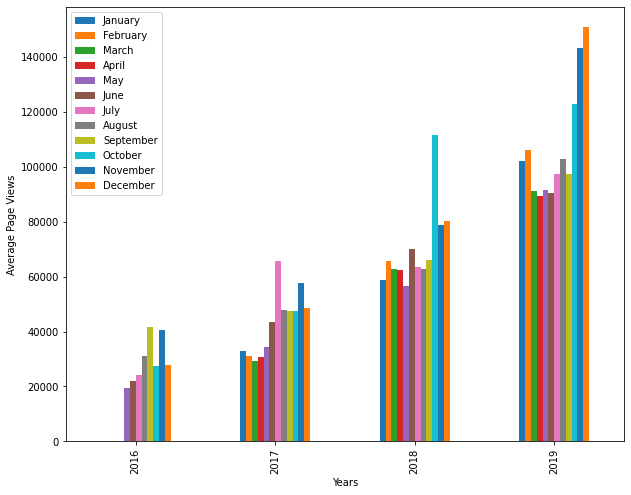

In [7]:
fig=df_bar.plot.bar(legend=True,figsize=(10,8),xlabel="Years",ylabel="Average Page Views").figure
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [8]:
#Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". 
#These box plots should show how the values are distributed within a given year or month and how it compares over time. 
#The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)".
# Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


In [9]:
df_box['month-num']=df_box['date'].dt.month
df_box=df_box.sort_values('month-num')
df_box.head(15)

,date,value,year,month,month-num
210,2017-01-06,37353,2017,Jan,1
937,2019-01-06,94108,2019,Jan,1
936,2019-01-05,77897,2019,Jan,1
935,2019-01-04,94514,2019,Jan,1
934,2019-01-03,100710,2019,Jan,1
933,2019-01-02,109708,2019,Jan,1
932,2019-01-01,58508,2019,Jan,1
205,2017-01-01,26185,2017,Jan,1
206,2017-01-02,28560,2017,Jan,1
207,2017-01-03,31525,2017,Jan,1


Text(0, 0.5, 'Page Views')

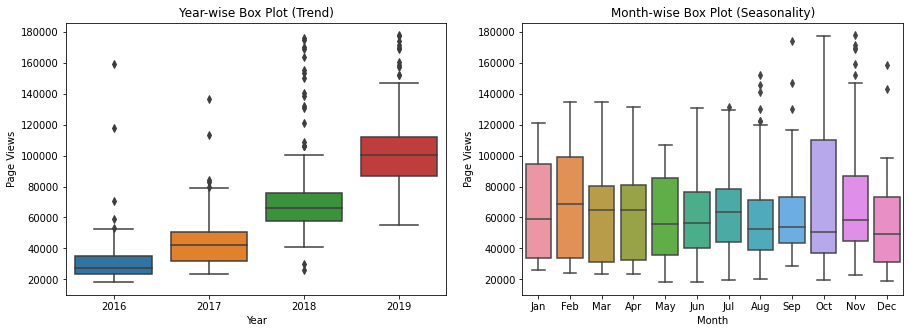

In [11]:
fig,a=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
a[0] = sns.boxplot(x=df_box['year'],y=df_box['value'],ax=a[0])
a[1] = sns.boxplot(x=df_box['month'],y=df_box['value'],ax=a[1])

a[0].set_title("Year-wise Box Plot (Trend)")
a[0].set_xlabel('Year')
a[0].set_ylabel('Page Views')

a[1].set_title("Month-wise Box Plot (Seasonality)")
a[1].set_xlabel('Month')
a[1].set_ylabel('Page Views')